In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/ColonData_whole_image/cp-0034/predictions_by_patient.npy')
gt = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/ColonData_whole_image/cp-0034/gt_by_patient.npy')

#data = np.load('..\\test\\Colon_SNV_whole_image\\cp-0034\\predictions_by_patient.npy')
#gt = np.load('..\\test\\Colon_SNV_whole_image\\cp-0034\\gt_by_patient.npy')

In [11]:
data_p = np.array(np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/ColonData/cp-0034/predictions_by_patient.npy', allow_pickle=True))
gt_p = np.array(np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/ColonData/cp-0034/gt_by_patient.npy', allow_pickle=True))

#data_p = np.array(np.load('..\\test\\Colon_SNV\\cp-0034\\predictions_by_patient.npy', allow_pickle=True))
#gt_p = np.array(np.load('..\\test\\Colon_SNV\\cp-0034\\gt_by_patient.npy', allow_pickle=True))

In [12]:
print(np.array(gt_p[0]).shape)
print(np.unique(gt_p[0]))
print(np.array(data_p[0]).shape)

(20405,)
[0 1]
(20405, 1)


In [13]:
data_ = np.reshape(data, (data.shape[0], 640, 480, 1))
data_.shape

(12, 640, 480, 1)

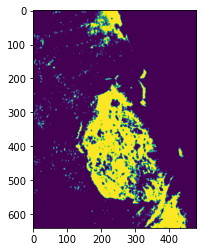

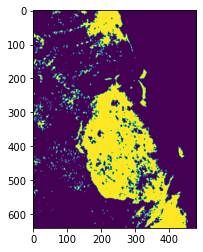

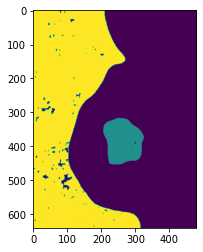

In [19]:
plt.imshow(data_[8])
plt.show()

plt.imshow(np.where(data_[8] > 0.0189, 1, 0))
plt.show()

plt.imshow(np.reshape(gt[8], (640, 480)))
plt.show()


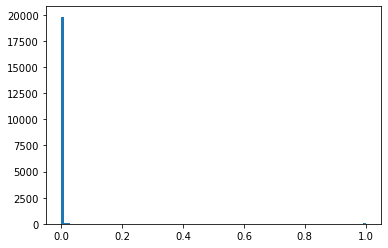

In [14]:
plt.hist(np.array(data_p[0]), bins=100)
plt.show()

In [15]:
gt_ = gt[0].astype(int)
print(gt_[gt_ == 0].shape, gt_[gt_ == 1].shape, gt_[gt_ == 2].shape) #0 - background, 1 - ill, 2 - healthy
ind = gt_ > 0
gt_ = gt_[ind]
print(gt_.shape)
print(np.unique(gt_))
pred = np.where(data[0] >= 0.0046, 1, 0)[ind]

gt_ = np.where(gt_ == 2, 1, 0)
#gt_ = np.where(gt_ == 1, 1, 0)

print(np.unique(pred), np.unique(gt_))

print(gt_[gt_ == 0].shape, gt_[gt_ == 1].shape)
print(pred[pred == 0].shape, pred[pred == 1].shape)

print(accuracy_score(gt_, pred))

(286795,) (1323,) (19082,)
(20405,)
[1 2]
[0 1] [0 1]
(1323,) (19082,)
(19757,) (648,)


NameError: name 'accuracy_score' is not defined

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score


#print(recall_score(gt_p[0], pred_p))
#print(f1_score(gt_p[0], pred_p))

0.08566527811810831


In [16]:
pred_p = np.where(np.array(data_p[0]) > 0.0046, 1, 0)
gt__ = np.array(gt_p[0])
print(pred_p[pred_p == 0].shape,pred_p[pred_p == 1].shape)
print(gt__[gt__ == 0].shape, gt__[gt__ == 1].shape)

(19757,) (648,)
(19082,) (1323,)


(20405, 1) (20405, 1)


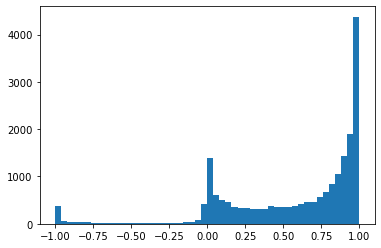

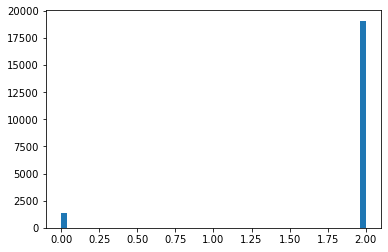

In [42]:
#такая разница, потому что частичные по порядку, а whole в реальном порядке
#но это не объясняет почему разные predictions

print(data[0][ind].shape, np.array(data_p[0]).shape)
plt.hist(data[0][ind] - np.array(data_p[0]), bins=50)
plt.show()

plt.hist(gt[0][ind] - np.array(gt_p[0]), bins=50)
plt.show()

#print(gt_p[0])

In [14]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score

print(accuracy_score(gt_p[0], pred_p))
print(recall_score(gt_p[0], pred_p))
print(f1_score(gt_p[0], pred_p))

0.965841705464347
0.8858654572940288
0.7707990792502466


In [11]:
from sklearn.metrics import  f1_score

gt = np.array([1, 1, 1, 1])
pred = np.array([1, 1, 1, 1])

f1_score(gt, pred, average=None)

array([1.])

In [12]:
np.insert([0], 1, 1)

array([0, 1])